In [2]:
import logging
from sys import stdout
from datetime import datetime

logging.basicConfig(
    level=logging.INFO,
    format="[%(asctime)s][%(levelname)s] %(message)s",
    stream=stdout,
    datefmt="%m-%d %H:%M:%S",
)
logging.info(datetime.now())

import numpy as np


# ####################################################################
def eliminacion_gaussiana(A: np.ndarray) -> np.ndarray:
    """Resuelve un sistema de ecuaciones lineales mediante el método de eliminación gaussiana.

    ## Parameters

    ``A``: matriz aumentada del sistema de ecuaciones lineales. Debe ser de tamaño n-by-(n+1), donde n es el número de incógnitas.

    ## Return

    ``solucion``: vector con la solución del sistema de ecuaciones lineales.

    """
    if not isinstance(A, np.ndarray):
        logging.debug("Convirtiendo A a numpy array.")
        A = np.array(
            A, dtype=float
        )  # convertir en float, porque si no, convierte en enteros
    assert A.shape[0] == A.shape[1] - 1, "La matriz A debe ser de tamaño n-by-(n+1)."
    n = A.shape[0]
    n_adds = 0
    n_mults = 0
    for i in range(0, n - 1):  # loop por columna

        # --- encontrar pivote
        p = None  # default, first element
        for pi in range(i, n):
            if A[pi, i] == 0:
                # must be nonzero
                continue

            if p is None:
                # first nonzero element
                p = pi
                continue

            if abs(A[pi, i]) < abs(A[p, i]):
                p = pi

        if p is None:
            # no pivot found.
            logging.info(f"\n{A}")
            raise ValueError("No existe solución única.")

        if p != i:
            logging.info(f"Intercambiando filas {i} y {p}.")
            # swap rows
            _aux = A[i, :].copy()
            A[i, :] = A[p, :].copy()
            A[p, :] = _aux

        # --- Eliminación: loop por fila
        for j in range(i + 1, n):
            m = A[j, i] / A[i, i]
            A[j, i:] = A[j, i:] - m * A[i, i:]
            n_mults += 1 + (n + 1 - i - 1)
            n_adds += n + 1 - i - 1

        logging.info(f"\n{A}")

    if A[n - 1, n - 1] == 0:
        # Sin embargo, esto solo se accede al finalizar la matriz... Con todos los pivotes
        if A[n - 1, n] == 0:
            raise ValueError("Infinitas soluciones.")
        else:
            raise ValueError("Sin solución.")

    # --- Sustitución hacia atrás
    solucion = np.zeros(n)
    solucion[n - 1] = A[n - 1, n] / A[n - 1, n - 1]

    n_mults += 1

    for i in range(n - 2, -1, -1):
        suma = 0
        n_adds -= 1
        for j in range(i + 1, n):
            suma += A[i, j] * solucion[j]
            n_mults += 1
            n_adds += 1
        solucion[i] = (A[i, n] - suma) / A[i, i]
        n_adds += 1
        n_mults += 1

    return solucion, n_adds, n_mults

[08-22 15:44:00][INFO] 2024-08-22 15:44:00.681881


In [3]:
import logging
from sys import stdout
from datetime import datetime

logging.basicConfig(
    level=logging.INFO,
    format="[%(asctime)s][%(levelname)s] %(message)s",
    stream=stdout,
    datefmt="%m-%d %H:%M:%S",
)
logging.info(datetime.now())

import numpy as np

from typing import Callable


# ####################################################################
def ajustar_min_cuadrados(
    xs: list,
    ys: list,
    gradiente: list[Callable[[list[float], list[float]], tuple]],
) -> None:
    """Resuelve el sistema de ecuaciones para encontrar los parámetros del método de mínimos cuadrados. Plantea el sistema de ecuaciones lineales al reemplazar los valores de ``xs`` y ``ys`` en las derivadas parciales.

    ## Parameters

    ``xs``: lista con los valores de x.

    ``ys``: lista con los valores de y.

    ``fcn``: función que se ajustará a los datos.

    ``gradiente``: lista con las funciones de derivadas parciales de ``fcn``.
    [IMPORTANTE] Cada función debe ser de la forma ``der_parcial(xi, yi)->``.

    ## Return

    ``a``:

    """

    assert len(xs) == len(ys), "xs y ys deben tener la misma longitud."

    n = len(xs)

    num_pars = len(gradiente)
    logging.info(f"Se ajustarán {num_pars} parámetros.")
    # --- construir matriz A y vector b
    Ab = np.zeros((num_pars, num_pars + 1), dtype=float)

    for i, der_parcial in enumerate(gradiente):
        assert callable(der_parcial), "Cada derivada parcial debe ser una función."

        Ab[i, :] = der_parcial(xs, ys)

    return eliminacion_gaussiana(Ab)

[08-22 15:44:00][INFO] 2024-08-22 15:44:00.721718


Ecuacion de la linea

In [4]:
# Derivadas parciales
# ####################################################################
def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """
    # COMPLETAR

    # coeficiente del término independiente
    c_ind = sum(ys)

    # coeficiente del parámetro 1
    c_1 = sum(xs)

    # coeficiente del parámetro 0
    c_0 = len(xs)

    return (c_1, c_0, c_ind)


In [5]:
def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 0 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """
    # COMPLETAR

    c_1 = 0
    c_0 = 0
    c_ind = 0
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += xi * yi

        # coeficiente del parámetro 1
        c_1 += xi * xi

        # coeficiente del parámetro 0
        c_0 += xi

    return (c_1, c_0, c_ind)

Conjunto de Datos

In [6]:
from scipy.stats import linregress
xs = [
    -4.5830,
    -4.4553,
    -3.9234,
    -3.7518,
    -2.8305,
    -2.4637,
    -2.4439,
    -1.6802,
    -1.6459,
    -1.4819,
    -0.9753,
    -0.9674,
    -0.8680,
    -0.8119,
    -0.6186,
    0.1804,
    0.2982,
    0.4094,
    0.7886,
    0.9505,
    0.9901,
    1.2252,
    1.4536,
    1.7131,
    2.0913,
    2.1728,
    2.1733,
    2.1864,
    2.3588,
    2.3641,
    3.0217,
    3.1986,
    3.2123,
    3.2376,
    3.7627,
    3.9286,
    4.3735,
    4.5765,
    4.9022,
    4.9421,
]


ys = [
    -2.2055,
    -1.4182,
    -0.1380,
    3.4292,
    2.3377,
    1.8784,
    3.5443,
    -0.6359,
    0.8778,
    2.4107,
    1.2681,
    -1.1540,
    -1.8487,
    -0.5652,
    -1.6703,
    -1.0710,
    -3.9284,
    -3.3157,
    -0.8727,
    -1.9583,
    -0.5810,
    0.1306,
    -0.1434,
    -2.7076,
    1.0219,
    0.7264,
    0.3696,
    2.1279,
    3.5456,
    2.8647,
    5.4094,
    10.0706,
    7.0016,
    7.9526,
    18.4160,
    18.3665,
    24.9403,
    31.7173,
    36.4407,
    39.8225,
]
linregress(xs, ys)

LinregressResult(slope=np.float64(2.592173397723531), intercept=np.float64(3.3109955697192315), rvalue=np.float64(0.6433916664353965), pvalue=np.float64(7.53666840886428e-06), stderr=np.float64(0.5003375571386381), intercept_stderr=np.float64(1.36832048573871))

Grafica de los puntos

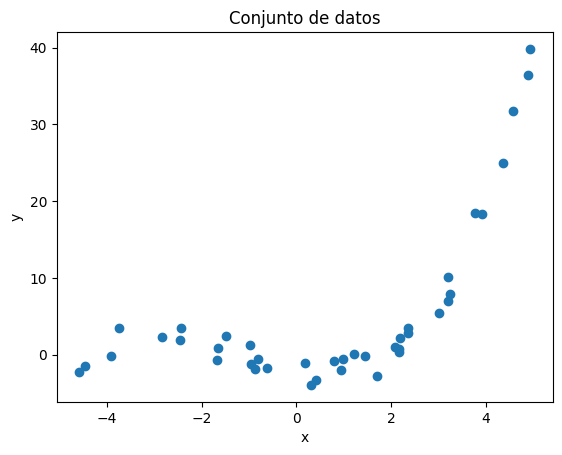

In [7]:
import matplotlib.pyplot as plt

plt.scatter(xs, ys)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Conjunto de datos")
plt.show()

In [8]:
pars = ajustar_min_cuadrados(xs, ys, gradiente=[der_parcial_0, der_parcial_1])
pars # parámetros de la curva ajustada

[08-22 15:44:10][INFO] Se ajustarán 2 parámetros.
[08-22 15:44:10][INFO] Intercambiando filas 0 y 1.
[08-22 15:44:10][INFO] 
[[   27.0108        40.           202.4565    ]
 [    0.          -416.01802705 -1377.43384448]]


(array([2.5921734 , 3.31099557]), 3, 6)

In [9]:
# ####################################################################
def linea(x: float, pars: tuple[float]) -> float:
    """Ecuación de la recta y = a1 * x + a0.

    ## Parameters

    ``x``: valor de x.

    ``pars``: parámetros de la recta. Deben ser de la forma (a1, a0).

    ## Return

    ``y``: valor de y.

    """
    a1, a0 = pars
    return a1 * x + a0

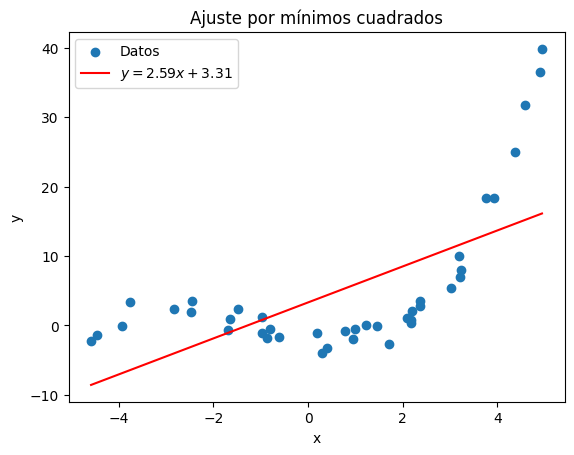

In [10]:
from scipy.stats import linregress
import numpy as np
import matplotlib.pyplot as plt  # Import for plotting

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(xs, ys)

# Generate linear fit points
x = np.linspace(min(xs), max(xs), 100)  # Adjust range for better visualization
y_l = slope * x + intercept

# Plot the data and linear fit
plt.scatter(xs, ys, label="Datos")
plt.plot(x, y_l, color="red", label=r"$ y = {:.2f}x + {:.2f} $".format(slope, intercept))  # Format slope and intercept with 2 decimals
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste por mínimos cuadrados")
plt.legend()
plt.show()

Ecuacion de segundo grado 

In [11]:
# ####################################################################
def der_parcial_0_parabol(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 0 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_2 * a_2 + c_1 * a_1 + c_0 * a_0 = c_ind    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_2``: coeficiente del parámetro 2.

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """
    c_2 = 0
    c_1 = 0
    c_0 = 0
    c_ind = 0
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += yi

        # coeficiente del parámetro 2
        c_2 += xi * xi

        # coeficiente del parámetro 1
        c_1 += xi

        # coeficiente del parámetro 0
        c_0 += 1

    return (c_2, c_1, c_0, c_ind)


# ####################################################################
def der_parcial_1_parabol(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_2 * a_2 + c_1 * a_1 + c_0 * a_0 = c_ind    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_2``: coeficiente del parámetro 2.

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """
    c_2 = 0
    c_1 = 0
    c_0 = 0
    c_ind = 0
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += yi * xi

        # coeficiente del parámetro 2
        c_2 += xi * xi * xi

        # coeficiente del parámetro 1
        c_1 += xi * xi

        # coeficiente del parámetro 0
        c_0 += xi

    return (c_2, c_1, c_0, c_ind)


# ####################################################################
def der_parcial_2_parabol(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 2 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:    c_2 * a_2 + c_1 * a_1 + c_0 * a_0 = c_ind

    ## Parameters
    ``xs``: lista de valores de x.
    ``ys``: lista de valores de y.
    ## Return
    ``c_2``: coeficiente del parámetro 2.
    ``c_1``: coeficiente del parámetro 1.
    ``c_0``: coeficiente del parámetro 0.
    ``c_ind``: coeficiente del término independiente.
    """

    c_2 = 0
    c_1 = 0
    c_0 = 0
    c_ind = 0
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += yi * xi**2

        # coeficiente del parámetro 2
        c_2 += xi**4

        # coeficiente del parámetro 1
        c_1 += xi**3

        # coeficiente del parámetro 0
        c_0 += xi**2

    return (c_2, c_1, c_0, c_ind)

In [12]:
def cuadratica(x: float, pars: tuple[float]) -> float:
    a2, a1, a0 = pars
    return a2 * x**2 + a1 * x + a0

In [13]:
pars_cuad = ajustar_min_cuadrados(
    xs,
    ys,
    gradiente=[der_parcial_0_parabol, der_parcial_1_parabol, der_parcial_2_parabol],
)
print(pars_cuad)

[08-22 15:44:11][INFO] Se ajustarán 3 parámetros.
[08-22 15:44:11][INFO] 
[[ 299.16407604   27.0108       40.          202.4565    ]
 [   0.          265.55011955  -22.76774264  612.96806067]
 [   0.          -26.58808212 -291.54315954  922.37630877]]
[08-22 15:44:11][INFO] Intercambiando filas 1 y 2.
[08-22 15:44:11][INFO] 
[[  299.16407604    27.0108        40.           202.4565    ]
 [    0.           -26.58808212  -291.54315954   922.37630877]
 [    0.             0.         -2934.57313462  9825.2586646 ]]
(array([ 0.9419096 ,  2.02123528, -3.34810489]), 11, 17)


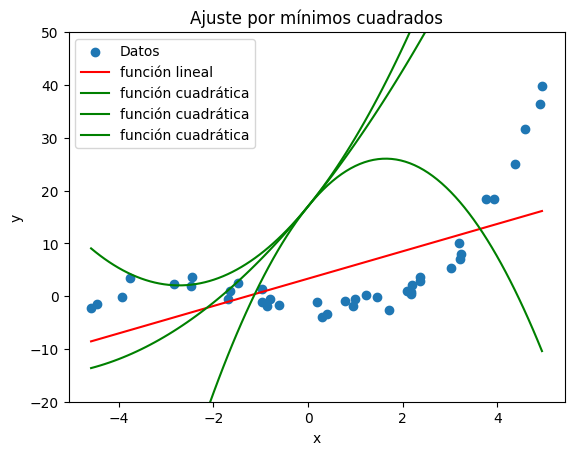

In [39]:
from scipy.stats import linregress
import numpy as np
import matplotlib.pyplot as plt  # Import for plotting

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(xs, ys)

# Generate linear fit points
x = np.linspace(min(xs), max(xs), 100)  # Adjust range for better visualization
y_l = slope * x + intercept

y_cuad = [cuadratica(xi, pars_cuad) for xi in x]

plt.scatter(xs, ys, label="Datos")
plt.plot(x, y_l, color="red", label=r"función lineal")
plt.plot(x, y_cuad, color="green", label=r"función cuadrática")
plt.xlabel("x")
plt.ylabel("y")
plt.ylim(-20, 50)
plt.title("Ajuste por mínimos cuadrados")
plt.legend()
plt.show()

Ecuacion cubica 

In [24]:
# ####################################################################
def der_parcial_cubica0(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 0 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_2 * a_2 + c_1 * a_1 + c_0 * a_0 = c_ind    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_2``: coeficiente del parámetro 2.

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """
    c_3 = 0
    c_2 = 0
    c_1 = 0
    c_0 = 0
    c_ind = 0
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += yi

        # coeficiente del parámetro 3
        c_3 += xi * xi *xi

        # coeficiente del parámetro 2
        c_2 += xi * xi

        # coeficiente del parámetro 1
        c_1 += xi

        # coeficiente del parámetro 0
        c_0 += 1

    return (c_3, c_2, c_1, c_0, c_ind)


# ####################################################################
def der_parcial_cubica1(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_2 * a_2 + c_1 * a_1 + c_0 * a_0 = c_ind    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_2``: coeficiente del parámetro 2.

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """
    c_3 = 0
    c_2 = 0
    c_1 = 0
    c_0 = 0
    c_ind = 0
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += yi * xi

        # coeficiente del parámetro 3
        c_3 += xi * xi * xi *xi

        # coeficiente del parámetro 2
        c_2 += xi * xi * xi

        # coeficiente del parámetro 1
        c_1 += xi * xi

        # coeficiente del parámetro 0
        c_0 += xi

    return (c_3, c_2, c_1, c_0, c_ind)


# ####################################################################
def der_parcial_cubica2(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 2 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:    c_2 * a_2 + c_1 * a_1 + c_0 * a_0 = c_ind

    ## Parameters
    ``xs``: lista de valores de x.
    ``ys``: lista de valores de y.
    ## Return
    ``c_2``: coeficiente del parámetro 2.
    ``c_1``: coeficiente del parámetro 1.
    ``c_0``: coeficiente del parámetro 0.
    ``c_ind``: coeficiente del término independiente.
    """

    c_3 = 0
    c_2 = 0
    c_1 = 0
    c_0 = 0
    c_ind = 0
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += yi * xi**2

        # coeficiente del parámetro 2
        c_3 += xi**5

        # coeficiente del parámetro 2
        c_2 += xi**4

        # coeficiente del parámetro 1
        c_1 += xi**3

        # coeficiente del parámetro 0
        c_0 += xi**2

    return (c_3, c_2, c_1, c_0, c_ind)

# ####################################################################
def der_parcial_cubica3(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 2 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:    c_2 * a_2 + c_1 * a_1 + c_0 * a_0 = c_ind

    ## Parameters
    ``xs``: lista de valores de x.
    ``ys``: lista de valores de y.
    ## Return
    ``c_2``: coeficiente del parámetro 2.
    ``c_1``: coeficiente del parámetro 1.
    ``c_0``: coeficiente del parámetro 0.
    ``c_ind``: coeficiente del término independiente.
    """

    c_3 = 0
    c_2 = 0
    c_1 = 0
    c_0 = 0
    c_ind = 0
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += yi * xi**2

        # coeficiente del parámetro 3
        c_3 += xi**5

        # coeficiente del parámetro 2
        c_2 += xi**4

        # coeficiente del parámetro 1
        c_1 += xi**3

        # coeficiente del parámetro 0
        c_0 += xi**2

    return (c_3, c_2, c_1, c_0, c_ind)

In [25]:
def cubica(x: float, pars: tuple[float]) -> float:
    a3, a2, a1, a0 = pars
    return a3 * x**3 + a2 * x**2 + a1*x + a0

In [29]:
pars_cub = ajustar_min_cuadrados(
    xs,
    ys,
    gradiente=[der_parcial_cubica0, der_parcial_cubica1, der_parcial_cubica2 ,der_parcial_cubica3],
)
print(pars_cub)

[08-22 15:57:26][INFO] Se ajustarán 4 parámetros.
[08-22 15:57:26][INFO] 
[[ 3.72298793e+02  2.99164076e+02  2.70108000e+01  4.00000000e+01
   2.02456500e+02]
 [ 0.00000000e+00 -3.17779277e+03 -2.13650948e+01 -4.47657364e+02
  -1.53757358e+03]
 [-9.09494702e-13 -1.10737974e+03 -1.26570718e+02 -4.39606357e+02
   1.72967389e+02]
 [-9.09494702e-13 -1.10737974e+03 -1.26570718e+02 -4.39606357e+02
   1.72967389e+02]]
[08-22 15:57:26][INFO] Intercambiando filas 1 y 2.
[08-22 15:57:26][INFO] 
[[ 3.72298793e+02  2.99164076e+02  2.70108000e+01  4.00000000e+01
   2.02456500e+02]
 [-9.09494702e-13 -1.10737974e+03 -1.26570718e+02 -4.39606357e+02
   1.72967389e+02]
 [ 0.00000000e+00  0.00000000e+00  3.41848621e+02  8.13859215e+02
  -2.03392952e+03]
 [-9.09494702e-13  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]]
[08-22 15:57:26][INFO] 
[[ 3.72298793e+02  2.99164076e+02  2.70108000e+01  4.00000000e+01
   2.02456500e+02]
 [-9.09494702e-13 -1.10737974e+03 -1.26570718e+02 -4.3960635

ValueError: Infinitas soluciones.

In [30]:
from scipy.stats import linregress
import numpy as np
import matplotlib.pyplot as plt  # Import for plotting

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(xs, ys)

# Generate linear fit points
x = np.linspace(min(xs), max(xs), 100)  # Adjust range for better visualization
y_l = slope * x + intercept

y_cub = [cubica(xi, pars_cub) for xi in x]

plt.scatter(xs, ys, label="Datos")
plt.plot(x, y_l, color="red", label=r"función lineal")
plt.plot(x, y_cub, color="green", label=r"función cuadrática")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste por mínimos cuadrados")
plt.legend()
plt.show()

NameError: name 'pars_cub' is not defined

Ecuacion Exponencial

In [36]:
# ####################################################################
def der_parcial_exp0(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 0 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_2 * a_2 + c_1 * a_1 + c_0 * a_0 = c_ind    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_2``: coeficiente del parámetro 2.

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """
    c_2 = 0
    c_1 = 0
    c_0 = 0
    c_ind = 0
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += yi

        # coeficiente del parámetro 2
        c_2 += xi * xi

        # coeficiente del parámetro 1
        c_1 += xi

        # coeficiente del parámetro 0
        c_0 += 1

    return (c_2, c_1, c_0, c_ind)


# ####################################################################
def der_parcial_exp1(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_2 * a_2 + c_1 * a_1 + c_0 * a_0 = c_ind    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_2``: coeficiente del parámetro 2.

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """
    c_2 = 0
    c_1 = 0
    c_0 = 0
    c_ind = 0
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += yi * xi

        # coeficiente del parámetro 2
        c_2 += xi * xi * xi

        # coeficiente del parámetro 1
        c_1 += xi * xi

        # coeficiente del parámetro 0
        c_0 += xi

    return (c_2, c_1, c_0, c_ind)

In [34]:
def exponencial(x: float, pars: tuple[float]) -> float:
    a1, a0 = pars
    return a1 * np.exp(a0 * x)


In [37]:
pars_exp= ajustar_min_cuadrados(
    xs,
    ys,
    gradiente=[der_parcial_exp0, der_parcial_exp1],
)
print(pars_exp)

[08-22 15:59:55][INFO] Se ajustarán 2 parámetros.


ValueError: could not broadcast input array from shape (4,) into shape (3,)

In [ ]:
calc_error_rel = lambda x, x_approx: abs(x - x_approx) / abs(x)

y_cuad = [cuadratica(xi, pars_cuad) for xi in xs]

errors = [calc_error_rel(yi, y_hat_i) for yi, y_hat_i in zip(ys, y_cuad)]
print(*errors, sep="\n")
sum(errors) / len(errors)

[ 5.17965786  5.09920719 46.03524076]
[ 8.38631992  6.72035684 68.43108959]
[ 83.48204324  36.91022621 562.00728104]
[ 4.21109223  0.21926815 21.82052236]
[ 3.81865697  0.11960823 18.52133004]
[ 3.33362462  0.15408308 17.19627678]
[2.20114163 0.38232507 9.43042331]
[ 2.85072911  7.64238529 16.19474965]
[ 0.64812106  3.97903818 12.59133286]
[0.14803148 1.13124341 3.75995801]
[4.65227814 5.46188738 1.43431026]
[7.27391518 8.14921909 3.79482956]
[5.41480894 5.85468014 3.6664453 ]
[16.37506986 17.63386611 11.37171059]
[7.31972504 7.56699871 6.33688213]
[18.75448521 18.78728236 18.62412581]
[6.18377906 6.20821067 6.08667031]
[7.53294083 7.58750066 7.31608096]
[31.0909409  31.86007325 28.03385721]
[15.45461291 15.9525535  13.47543982]
[50.59458193 52.41568489 43.35621246]
[243.18923935 255.59499753 193.87985753]
[244.93173408 260.83525152 181.71974798]
[15.25924547 16.42910424 10.60938754]
[42.17817324 46.79747983 23.81773536]
[61.42787935 68.4426937  33.5459753 ]
[121.7141731  135.50721037 

array([27.62928431, 28.29534195, 36.64307312])

In [ ]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(xs, ys)

y_linea = slope * x + intercept

errors = [calc_error_rel(yi, y_hat_i) for yi, y_hat_i in zip(ys, y_linea)]
print(*errors, sep="\n")
sum(errors) / len(errors)

3.676567203556002
5.236287721152632
45.294474817641756
0.8130677136155555
1.7044129196331281
2.421443974085532
0.8428391049341659
11.43608887924841
6.679475047858242
1.8397467439772124
4.481043888022841
7.113731397831599
4.87298118234087
13.853352070929697
5.412051050221736
7.978695749655711
2.929263167339672
3.3173543159131
9.924471163021618
5.030598101754005
14.76567046705812
61.04126202187341
58.23377335252837
4.069898573440859
7.236414185482304
10.731175571090679
22.339448629697426
3.103103760624122
1.4920263907175004
2.120907267645432
0.6721258047694328
0.09142140418488773
0.32179300241538666
0.1768981420425357
0.48609174396701943
0.47900423478619925
0.6121296455738235
0.6917033518240496
0.7287902933289708
0.7491918931111087


np.float64(8.375019398722378)

In [32]:
y_cub = [cubica(xi, pars) for xi in xs]

errors = [calc_error_rel(yi, y_hat_i) for yi, y_hat_i in zip(ys, y_linea)]
print(*errors, sep="\n")
sum(errors) / len(errors)

ValueError: not enough values to unpack (expected 4, got 3)

In [33]:
y_exp = [exponencial(xi, pars) for xi in xs]

errors = [calc_error_rel(yi, y_hat_i) for yi, y_hat_i in zip(ys, y_linea)]
print(*errors, sep="\n")
sum(errors) / len(errors)

NameError: name 'exponencial' is not defined